In [1]:
%matplotlib inline

In [118]:
import sys
sys.path.insert(0,'/homelocal/mrilee/git/pystareplotlib')

import os
os.environ['PROJ_LIB'] = '/homelocal/mrilee/opt/anaconda3/envs/stare-1/share/proj'

import pystare
import starepandas
import geopandas

import matplotlib.pyplot as plt
import matplotlib.tri as tri
import cartopy
import cartopy.crs as ccrs

import pystareplotlib
import pystareplotlib.pystareplotlib as psplot

import numpy


plot_options = {'projection': ccrs.PlateCarree(central_longitude=0.0)
                ,'transform': ccrs.Geodetic()}

plot_options['projection']._threshold = 0.01;

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
def mnmx(x):
    return min(x),max(x)
def span(x):
    return max(x)-min(x)

# Loading a country

In [5]:
gdf = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))#, rows=slice(120, 130))
gdf = gdf[gdf.name =='Luxembourg']

level = 4

roi = starepandas.STAREDataFrame(gdf)
roi.set_sids(roi.make_sids(resolution=level), inplace=True)

roi.to_stare_singleres(inplace=True)
roi.set_trixels(roi.make_trixels(), inplace=True)

sids = roi.sids.iloc[0]

In [6]:

resolution_fine = 8

sids_fine = roi.make_sids(resolution=resolution_fine)
roi['sids_fine'] = sids_fine
roi['trixels_fine'] = roi.make_trixels('sids_fine')


In [7]:
proj = cartopy.crs.NearsidePerspective(central_longitude=-110, central_latitude=20)
proj = cartopy.crs.PlateCarree()

opts = {'projection': proj}

transf = cartopy.crs.Geodetic()

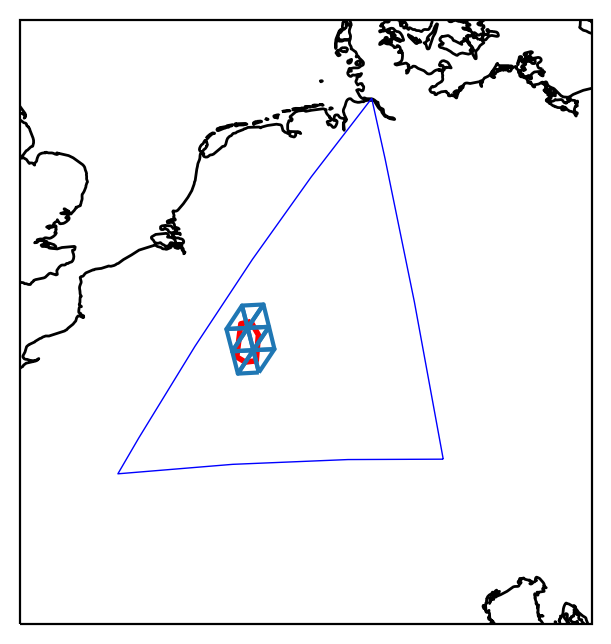

In [123]:
# proj = cartopy.crs.NearsidePerspective(central_longitude=-110, central_latitude=20)

fig, ax = plt.subplots(figsize=(4, 4), dpi=200, subplot_kw=plot_options)
ax.coastlines()
#ax.set_global()
#ax.set_extent([-179, -50, 90, 10])
ax.set_extent([0, 15, 45, 55])

roi.set_trixels('trixels').plot(ax=ax, lw=0.5, color='b', transform=plot_options['transform'] )
roi.plot(ax=ax, trixels=False, boundary=False, lw=2, color='white', edgecolor='r', transform=plot_options['transform'])
roi.set_trixels('trixels_fine').plot(ax=ax, transform=plot_options['transform'])

del fig,ax

In [9]:
sids = roi.hex()

In [124]:
sids

[['0x3b68000000000004']]

# Reading iFVOs from the pods for the country

In [10]:
s1 = starepandas.read_pods(pod_root='/tablespace/xcal/starepods/', sids=[sids[0][0]], pattern='S1', add_podname=True)

In [11]:
s1.set_sids('stare',inplace=True)

In [12]:
roi['sids_fine']

128    [4282096412885254152, 4282149189443387400, 428...
Name: sids_fine, dtype: object

In [13]:
s1.reset_index(inplace=True); s1

,index,lat,lon,stare,timestamp,Tc1,Tc2,Tc3,pod,Tc4,Tc5,Tc6
0,166196,53.707375,9.232788,4281235567476048393,2021-01-10 04:49:31.000017,254.259995,240.820007,255.210007,/tablespace/xcal/starepods//0x3b68000000000004...,NaN,NaN,NaN
1,166286,53.601875,9.164490,4281241134716221737,2021-01-10 04:49:32.000916,255.589996,242.229996,256.420013,/tablespace/xcal/starepods//0x3b68000000000004...,NaN,NaN,NaN
2,166376,53.496239,9.096436,4281263642716736521,2021-01-10 04:49:34.000816,256.799988,245.029999,257.760010,/tablespace/xcal/starepods//0x3b68000000000004...,NaN,NaN,NaN
3,166465,53.397469,8.633575,4281248441320251241,2021-01-10 04:49:36.000714,250.970001,235.649994,253.279999,/tablespace/xcal/starepods//0x3b68000000000004...,NaN,NaN,NaN
4,166466,53.390667,9.028748,4281269261315043529,2021-01-10 04:49:36.000714,258.309998,247.029999,258.790009,/tablespace/xcal/starepods//0x3b68000000000004...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
775568,86871,53.133450,9.070593,4281257220312546632,2021-02-07 12:53:30.000684,245.000000,252.149994,250.710007,/tablespace/xcal/starepods//0x3b68000000000004...,246.979996,240.679993,234.880005
775569,86966,53.261925,8.480487,4281244806311098856,2021-02-07 12:53:33.000351,246.380005,252.449997,251.020004,/tablespace/xcal/starepods//0x3b68000000000004...,247.940002,241.360001,237.380005
775570,86967,53.288887,9.037922,4281261878427013864,2021-02-07 12:53:33.000351,245.089996,251.309998,250.339996,/tablespace/xcal/starepods//0x3b68000000000004...,246.820007,240.729996,236.119995
775571,87063,53.445137,9.016545,4281267905891783976,2021-02-07 12:53:36.000018,242.479996,251.559998,250.229996,/tablespace/xcal/starepods//0x3b68000000000004...,247.089996,242.119995,237.720001


In [129]:
s1[s1.pod.str.contains('ATMS')]

,index,lat,lon,stare,timestamp,Tc1,Tc2,Tc3,pod,Tc4,Tc5,Tc6,level
0,166196,53.707375,9.232788,4281235567476048393,2021-01-10 04:49:31.000017,254.259995,240.820007,255.210007,/tablespace/xcal/starepods//0x3b68000000000004...,NaN,NaN,NaN,2
1,166286,53.601875,9.164490,4281241134716221737,2021-01-10 04:49:32.000916,255.589996,242.229996,256.420013,/tablespace/xcal/starepods//0x3b68000000000004...,NaN,NaN,NaN,2
2,166376,53.496239,9.096436,4281263642716736521,2021-01-10 04:49:34.000816,256.799988,245.029999,257.760010,/tablespace/xcal/starepods//0x3b68000000000004...,NaN,NaN,NaN,2
3,166465,53.397469,8.633575,4281248441320251241,2021-01-10 04:49:36.000714,250.970001,235.649994,253.279999,/tablespace/xcal/starepods//0x3b68000000000004...,NaN,NaN,NaN,2
4,166466,53.390667,9.028748,4281269261315043529,2021-01-10 04:49:36.000714,258.309998,247.029999,258.790009,/tablespace/xcal/starepods//0x3b68000000000004...,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
775568,86871,53.133450,9.070593,4281257220312546632,2021-02-07 12:53:30.000684,245.000000,252.149994,250.710007,/tablespace/xcal/starepods//0x3b68000000000004...,246.979996,240.679993,234.880005,4
775569,86966,53.261925,8.480487,4281244806311098856,2021-02-07 12:53:33.000351,246.380005,252.449997,251.020004,/tablespace/xcal/starepods//0x3b68000000000004...,247.940002,241.360001,237.380005,4
775570,86967,53.288887,9.037922,4281261878427013864,2021-02-07 12:53:33.000351,245.089996,251.309998,250.339996,/tablespace/xcal/starepods//0x3b68000000000004...,246.820007,240.729996,236.119995,4
775571,87063,53.445137,9.016545,4281267905891783976,2021-02-07 12:53:36.000018,242.479996,251.559998,250.229996,/tablespace/xcal/starepods//0x3b68000000000004...,247.089996,242.119995,237.720001,4


In [16]:
s1['level']=2**(10-pystare.spatial_resolution(s1['stare']))

In [17]:
max(pystare.spatial_resolution(s1['stare']))

10

In [18]:
# s1['level']=pystare.spatial_resolution(s1['stare'])

In [19]:
# max(s1['level'] - (s1['stare'] & 31))

In [20]:
mask = s1.stare_intersects(roi['sids_fine'].iloc[0]); mask

0         False
1         False
2         False
3         False
4         False
          ...  
775568    False
775569    False
775570    False
775571    False
775572    False
Length: 775573, dtype: bool

In [21]:
roi['sids_fine'].values[0]

array([4282096412885254152, 4282149189443387400, 4282157985536409608,
       4282175577722454024, 4282193169908498440, 4282369091768942600,
       4282395480048009224, 4282413072234053640, 4282421868327075848,
       4282483440978231304])

In [22]:
s1_ = s1[mask]

In [23]:
s1_.reset_index(inplace=True)

In [24]:
s1_

,level_0,index,lat,lon,stare,timestamp,Tc1,Tc2,Tc3,pod,Tc4,Tc5,Tc6,level
0,229,169073,50.333767,6.083466,4282376237120296969,2021-01-10 04:50:31.000776,260.679993,253.059998,261.359985,/tablespace/xcal/starepods//0x3b68000000000004...,NaN,NaN,NaN,2
1,243,169163,50.226711,6.026489,4282376497619289481,2021-01-10 04:50:33.000674,260.750000,253.509995,260.429993,/tablespace/xcal/starepods//0x3b68000000000004...,NaN,NaN,NaN,2
2,244,169164,50.215107,6.394501,4282490074322059913,2021-01-10 04:50:33.000674,261.920013,254.610001,261.929993,/tablespace/xcal/starepods//0x3b68000000000004...,NaN,NaN,NaN,2
3,256,169252,50.136421,5.602905,4282102433301725577,2021-01-10 04:50:35.000574,259.859985,252.880005,259.760010,/tablespace/xcal/starepods//0x3b68000000000004...,NaN,NaN,NaN,2
4,257,169253,50.119629,5.969757,4282371003489611753,2021-01-10 04:50:35.000574,260.799988,252.949997,260.940002,/tablespace/xcal/starepods//0x3b68000000000004...,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31062,775435,85134,50.061775,5.691274,4282104034757978025,2021-02-07 12:52:42.000684,268.130005,262.880005,258.470001,/tablespace/xcal/starepods//0x3b68000000000004...,254.369995,247.589996,241.389999,2
31063,775436,85135,50.092190,6.051942,4282369247826215369,2021-02-07 12:52:42.000684,266.079987,260.140015,255.440002,/tablespace/xcal/starepods//0x3b68000000000004...,250.509995,243.960007,239.110001,2
31064,775437,85136,50.122360,6.424476,4282487358411654377,2021-02-07 12:52:42.000684,266.100006,259.790009,254.690002,/tablespace/xcal/starepods//0x3b68000000000004...,249.330002,243.460007,237.910004,2
31065,775448,85231,50.247814,6.007509,4282376657468874121,2021-02-07 12:52:45.000351,266.529999,260.149994,255.449997,/tablespace/xcal/starepods//0x3b68000000000004...,251.279999,244.110001,238.440002,2


In [25]:
# s1_ = s1

In [26]:
s1_.set_sids('stare', inplace=True)

## Plotting

In [27]:
s1_.set_geometry(geopandas.points_from_xy(s1_.lon, s1_.lat, crs=4326), inplace=True)

/homelocal/mrilee/opt/anaconda3/envs/stare-1/lib/python3.10/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [28]:
s1_.set_trixels(s1_.make_trixels(n_workers=600), inplace=True)

/homelocal/mrilee/opt/anaconda3/envs/stare-1/lib/python3.10/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [29]:
bounds = roi.bounds.values.flatten(); bounds

array([ 5.67405195, 49.44266714,  6.24275109, 50.12805166])

In [30]:
bbox = [bounds[0],bounds[2],bounds[1],bounds[3]]; bbox

[5.674051954784829, 6.242751092156993, 49.44266714130711, 50.128051662794235]

In [31]:
mnmx(pystare.spatial_resolution(s1_.stare))

(7, 10)

In [32]:
numpy.unique(pystare.spatial_clear_to_resolution(s1_[ pystare.spatial_resolution(s1_.stare) == 7].stare.values))

array([4282078820699209735, 4282149189443387399, 4282184373815476231,
       4282360295675920391, 4282395480048009223, 4282465848792186887])

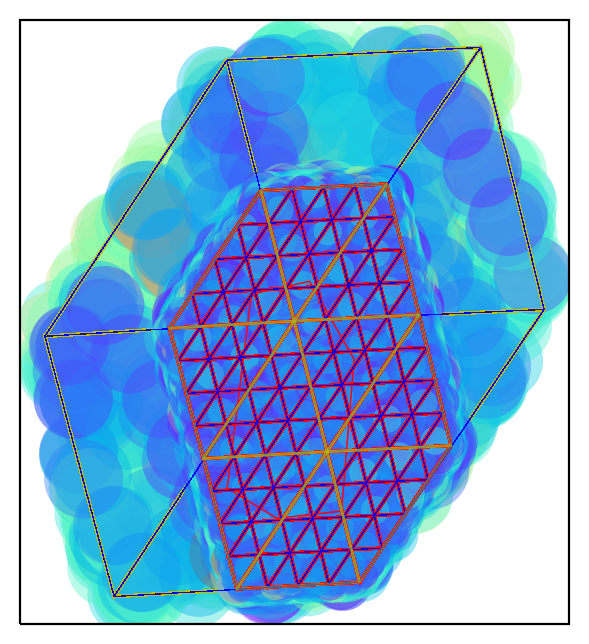

In [121]:
# proj = cartopy.crs.NearsidePerspective(central_longitude=-110, central_latitude=20)


usr_figax = psplot.FigAxContainer(
    plt.subplots(figsize=(4,4), dpi=200
    ,subplot_kw=plot_options))

transf = plot_options['transform']

ax = usr_figax.ax
    
ax.coastlines()
#ax.set_extent([-179, -50, 90, 10])
#ax.set_extent(bbox)

roi.boundary.plot(ax=ax, transform=transf, lw=0.5, color='r')

s1_.plot(ax=ax, trixels=True, lw=0.1, color='b', transform=transf, markersize=1)
# s1_.plot(ax=ax, column='Tc1', trixels=False, lw=0.1, transform=transf, markersize=10*s1_['level'], alpha=0.125, cmap='rainbow_r')

# s1_a = s1_[9540:9550]

colors={1:'r',2:'g',4:'b',8:'y'}
for l in [8,4,2,1]:
    s1_a = s1_[s1_.level == l]
    s1_a.plot(ax=ax, column='Tc1', trixels=False, lw=0.1, transform=transf, markersize=100*s1_a['level'], alpha=0.4, cmap='rainbow_r')

    # b = [4282096412885254152]
    b=s1_a.stare

    usr_figax, sivs_cache, sivs_triang = psplot.hello_plot(b,usr_figax,rasterized=True,plot_options=plot_options,color=colors[l],show_fig=False)

roi.set_trixels('trixels_fine').plot(ax=ax, trixels=True, lw=1, color='y', transform=transf, alpha=0.5, boundary=True)

# Add a column with the resolution level to set the markersize.
del usr_figax,ax

In [88]:
mnmx(s1_.level)

(1, 8)

In [93]:
roi

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,sids,trixels,sids_fine,trixels_fine
128,594130,Europe,Luxembourg,LUX,58740.0,"POLYGON ((6.04307 50.12805, 6.24275 49.90223, ...",[4280671445815656452],"MULTIPOLYGON (((11.10559 47.79025, 9.22867 53....","[4282096412885254152, 4282149189443387400, 428...","MULTIPOLYGON (((5.97439 50.01286, 5.82452 50.3..."


In [104]:
roi.sids.values[0]

array([4280671445815656452])

In [114]:
 opts['projection']._threshold

0.01

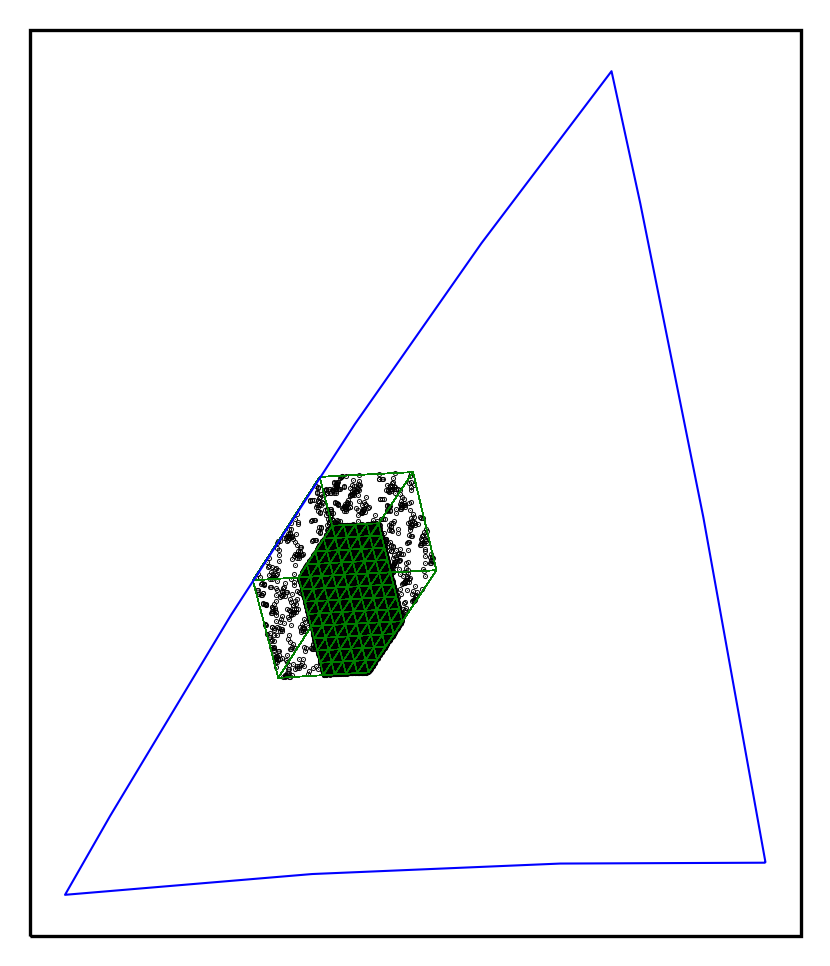

In [122]:
usr_figax = psplot.FigAxContainer(
    plt.subplots(figsize=(4,4), dpi=300
    ,subplot_kw=plot_options))

transf = plot_options['transform']

ax = usr_figax.ax

#proj = cartopy.crs.NearsidePerspective(central_longitude=-110, central_latitude=20)
#proj = cartopy.crs.PlateCarree()
#opts = {'projection': proj}

# fig, ax = plt.subplots(figsize=(4, 4), dpi=300, subplot_kw=opts)
#ax.coastlines()
#ax.set_extent([-166, -149, 18, 23])

if True:
    s1_.plot(ax=ax, trixels=False,  markersize=0.2, color='k', marker='.',transform=transf)
    s1_.plot(ax=ax, trixels=True, lw=0.2, color='g',transform=transf)

roi.plot(ax=ax, trixels=True, transform=transf, lw=0.5, color='b')

if False:
    b = roi.sids.values[0]
    usr_figax, sivs_cache, sivs_triang = psplot.hello_plot(b,usr_figax,rasterized=True,plot_options=plot_options,color='r',show_fig=False)
    
    

del usr_figax, ax